# Explorando a planilha Crustaceas_MN

## Imports

Focar nos gráficos: profundidade e holótipo (por biólogo  + ao longo do tempo, ordem (filo, etc))

Waffle chart ou treemap (% salvo de cada coleção por departamento)

In [1]:
import numpy as np
import pandas as pd
import altair as alt
import datetime as dt
import math as mt
import array as arr

alt.renderers.enable('notebook')   # renderizador do altair para notebook

RendererRegistry.enable('notebook')

## Importando base de dados

<font color='blue'>Planilha geral Atualizda FINAL com correções.xlsx</font>

In [2]:
# file_name = './data/db.csv'
crustaceas = pd.read_csv('db.csv', sep=',', encoding='utf-8', index_col=False, low_memory=False)

# importando dados para ver se o código funciona com a minha base
# excel_name = './Planilha geral Atualizda FINAL com correções.xlsx'
# excel_file = pd.ExcelFile(excel_name)
# crustaceas = excel_file.parse(excel_file.sheet_names[0], sep=';', encoding='utf-8-sig') 


# calling head() method   
# storing in new variable  
#crustaceas_top = crustaceas.head()      
# display  
#crustaceas_top

# Genus1 = crustaceas.Genus1.unique()
# Genus1
# crustaceas[['Genus1']].count()

In [3]:
crustaceas.head()

,Catalog Number,Cataloger First Name,Cataloger Middle,Cataloger Last Name,Cataloged Date,on line,Input Type,Alt Cat Number,reserved,Object Condition,...,waterBody,Continent,Country,State,County,Latitude1,Longitude1,Datum,Latitude/Longitude Type,Lat/Long Method
0,MNRJcarcino 000001,NaN,NaN,Legado,1980/10/30,1,Doacao,NaN,NaN,Material Disponivel,...,Oceano Atlantico Sul,America do Sul,Brasil,Parana,NaN,25.830035 S,48.528374 W,NaN,Point,NaN
1,MNRJcarcino 000002,NaN,NaN,Legado,1980/10/31,1,Doacao,NaN,NaN,Material Disponivel,...,Oceano Atlantico Sul,America do Sul,Brasil,Pernambuco,NaN,NaN,NaN,NaN,Point,NaN
2,MNRJcarcino 000003,NaN,NaN,Legado,1980/10/31,1,Doacao,NaN,NaN,Material Disponivel,...,Oceano Atlantico Sul,America do Sul,Brasil,Rio de Janeiro,Rio de Janeiro,23.00347 S,43.640745 W,NaN,Point,NaN
3,MNRJcarcino 000004,NaN,NaN,Legado,1980/10/30,1,Doacao,NaN,NaN,Material Disponivel,...,Oceano Atlantico Sul,America do Sul,Brasil,Parana,NaN,NaN,NaN,NaN,Point,NaN
4,MNRJcarcino 000005,NaN,NaN,Legado,1980/10/31,1,Doacao,NaN,NaN,Material Disponivel,...,Oceano Atlantico Sul,America do Sul,Brasil,Ceara,Fortaleza,3.811753 S,38.478649 W,NaN,Point,NaN


Loading Crustaceas spreadsheet into a DataFrame:

In [4]:
Table_Date1 = crustaceas['Class1']

In [6]:
# não tem essa coluna na planilha excel que importei...
Table_Date1 = crustaceas[['Habitat Type']].groupby('Habitat Type').count()
Table_Date1

""
Habitat Type
Agua Doce
Bacia Amazonica
Bacia do Paraiba
Bacia do Sao Francisco
Caatinga
Caverna
Entre Mares
Entre-Mares
Epifito


In [7]:
teste = crustaceas.groupby('Genus1').count()
#teste

In [10]:
crust_class = crustaceas[['Kingdom', 'Phylum1', 'Subphylum1', 'Class1', 'Subclass1',
 'Infraclass1', 'Superorder1', 'Order1', 'Suborder1', 'Infraorder1', 'Superfamily1',
 'Family1', 'Subfamily1', 'Tribe1', 'Genus1', 'Species1', 'Phylum2', 'Subphylum2',
 'Class2', 'Subclass2', 'Infraclass2', 'Superorder2', 'Order2', 'Suborder2', 'Infraorder2',
 'Superfamily2', 'Family2', 'Subfamily2', 'Tribe2', 'Genus2', 'Species2']]
#list(crust_class.columns.values)
#crust_class

In [12]:
crust_class.Class1.value_counts()

Malacostraca     24436
Maxillopoda       2030
Copepoda           977
Ostracoda          548
Hexanauplia         39
Branchiopoda        34
Phyllocarida        10
Indeterminado        9
Cephalocarida        8
Tantulocarida        2
Remipedia            1
Name: Class1, dtype: int64

In [10]:
Table_Date = crustaceas[['Cataloged Date','Class1','Kingdom']]
# Table_Date
# print(Table_Date.loc[0,'Class1'])
# print(Table_Date.size)
d = []
counter=0
for row in Table_Date['Cataloged Date']:
#     print(row)
    if not str(row).find('/')==-1:
        dates_values = str(row).split("/")
        year = int(dates_values[0])
        month = int(dates_values[1])
        if (month>1) and (month<12):
            #store the year and month in a datetime datatype for later sorting
            dateRecord = dt.datetime(year,month,1)
#         else:
#             #if the month is not valid, then use 1/1/1 as the date
#             dateRecord = dt.datetime(1,1,1)
#     else:
#         #if the date is nan, then use 1/1/1 as the date
#         dateRecord = dt.datetime(1,1,1)         
    d.append({'year':year, 'class':Table_Date.loc[counter,'Class1'],
              'kingdom':Table_Date.loc[counter,'Kingdom']})
    counter = counter+1
NewTable_Date = pd.DataFrame(d)
NewTable_Date

,year,class,kingdom
0,1980,Malacostraca,Animalia
1,1980,Malacostraca,Animalia
2,1980,Malacostraca,Animalia
3,1980,Malacostraca,Animalia
4,1980,Malacostraca,Animalia
...,...,...,...
28684,2017,Malacostraca,Animalia
28685,2017,Malacostraca,Animalia
28686,2017,Malacostraca,Animalia
28687,2017,Malacostraca,Animalia


In [11]:
amount  = crustaceas['Cataloged Date'].value_counts(sort=False)
classes = NewTable_Date['class'].unique()
classes

array(['Malacostraca', 'Maxillopoda', nan, 'Copepoda', 'Ostracoda',
       'Branchiopoda', 'Cephalocarida', 'Tantulocarida', 'Remipedia',
       'Phyllocarida', 'Indeterminado', 'Hexanauplia'], dtype=object)

In [13]:
e = []
countam = 0
for classSp in classes:
    p = NewTable_Date.loc[NewTable_Date.loc[:,'class']==classSp,:]
#     p.year.value_counts()
#     print(p['class'])
    numbers = p.year.value_counts(sort=False)
#     print(p.year.value_counts(sort=False))
    for oneyear in p.year.unique():
        countam = countam + numbers.loc[oneyear]
        e.append({'class':p['class'].unique()[0],'kingdom':p.kingdom.unique()[0],'year':oneyear,'amount':numbers.loc[oneyear]})
NewTable_Years = pd.DataFrame(e)
NewTable_Years

,class,kingdom,year,amount
0,Malacostraca,Animalia,1980,52
1,Malacostraca,Animalia,2009,288
2,Malacostraca,Animalia,1981,118
3,Malacostraca,Animalia,1985,75
4,Malacostraca,Animalia,1982,112
...,...,...,...,...
196,Phyllocarida,Animalia,2004,1
197,Phyllocarida,Animalia,2006,1
198,Indeterminado,Animalia,2015,8
199,Indeterminado,Animalia,2017,1


In [14]:
e = []
countam = 0
for classSp in classes:
    p = NewTable_Date.loc[NewTable_Date.loc[:,'class']==classSp,:]
#     p.year.value_counts()
#     print(p['class'])
    numbers = p.year.value_counts(sort=False)
#     print(p.year.value_counts(sort=False))
    for oneyear in p.year.unique():
        countam = countam + numbers.loc[oneyear]
        e.append({'class':p['class'].unique()[0],'year':oneyear,'amount':numbers.loc[oneyear]})
NewTable_Years = pd.DataFrame(e)
NewTable_Years
# print(countam)

28094


In [17]:
ordered_amount = amount.sort_index()
# for classAn in ordered_amount:
#     print(classAn)
#     crust_class.Class1.unique()
#     print(classAn.unique())

# ordered_amount
# ordered_amount.dtype

In [18]:
F_amount=pd.DataFrame({'x': np.arange(ordered_amount.size), 'y': ordered_amount})
F_amount

,x,y
1900/01/01,0,1
1900/01/03,1,2
1901/07/00,2,3
1901/09/00,3,1
1903/01/21,4,2
...,...,...
2017/07/20,2022,2
2017/07/21,2023,1
2017/07/22,2024,1
2017/08/10,2025,14


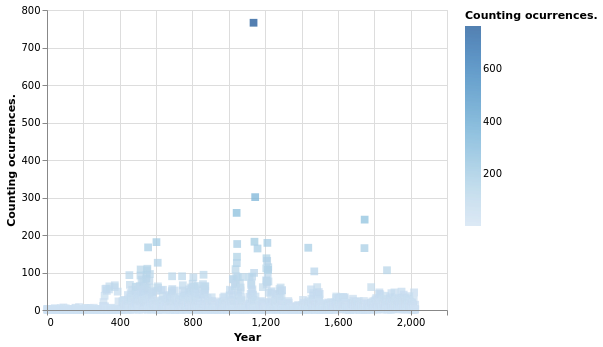

In [19]:
alt.Chart(F_amount).mark_square(size=60).encode(
    x= alt.X('x', title='Year'),
    y= alt.Y('y', title='Counting ocurrences.'),
    color=alt.Color('y', title='Counting ocurrences.')
)

To enhance this I should aggregate counts by month. Find out how to work with date_time calculations in pandas!

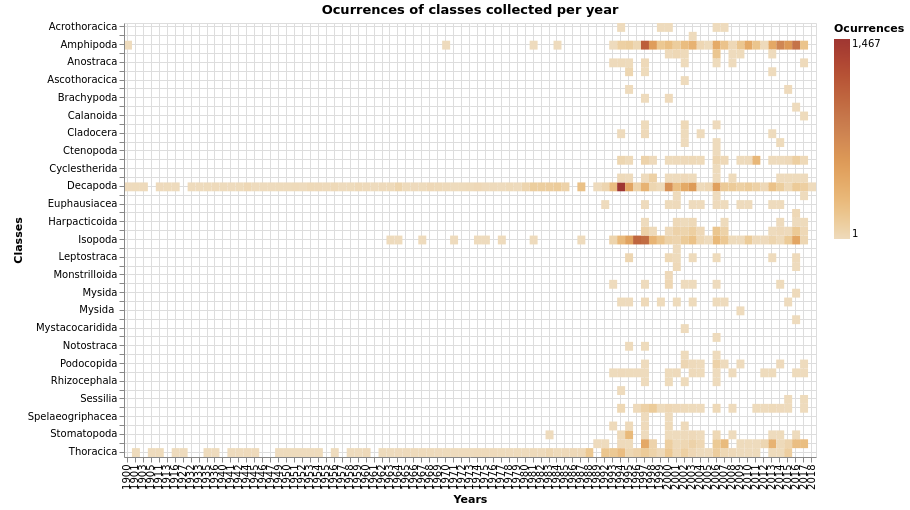

In [22]:
import numpy as np
import pandas as pd
import altair as alt
import datetime as dt
import math as mt
import array as arr

# file_name = './data/db.csv'
# crustaceas = pd.read_csv(file_name, sep=',', encoding='utf-8', index_col=False, low_memory=False)

# Table_Date = crustaceas[['Cataloged Date','Class1']]
# # Table_Date
# # print(Table_Date.loc[0,'Class1'])
# # print(Table_Date.size)
# d = []
# counter=0
# for row in Table_Date['Cataloged Date']:
# #     print(row)
#     if not str(row).find('/')==-1:
#         dates_values = str(row).split("/")
#         year = int(dates_values[0])
#         month = int(dates_values[1])
#         if (month>1) and (month<12):
#             #store the year and month in a datetime datatype for later sorting
#             dateRecord = dt.datetime(year,month,1)
# #         else:
# #             #if the month is not valid, then use 1/1/1 as the date
# #             dateRecord = dt.datetime(1,1,1)
# #     else:
# #         #if the date is nan, then use 1/1/1 as the date
# #         dateRecord = dt.datetime(1,1,1)         
#     d.append({'year':year, 'class':Table_Date.loc[counter,'Class1']})
#     counter = counter+1
# NewTable_Date = pd.DataFrame(d)
# NewTable_Date
Table_Date = crustaceas[['Cataloged Date','Class1','Order1','Kingdom']]
# Table_Date
# print(Table_Date.loc[0,'Class1'])
# print(Table_Date.size)
d = []
counter=0
for row in Table_Date['Cataloged Date']:
#     print(row)
    if not str(row).find('/')==-1:
        dates_values = str(row).split("/")
        year = int(dates_values[0])
        month = int(dates_values[1])
        if (month>1) and (month<12):
            #store the year and month in a datetime datatype for later sorting
            dateRecord = dt.datetime(year,month,1)
#         else:
#             #if the month is not valid, then use 1/1/1 as the date
#             dateRecord = dt.datetime(1,1,1)
#     else:
#         #if the date is nan, then use 1/1/1 as the date
#         dateRecord = dt.datetime(1,1,1)         
    d.append({'year':year, 'class':Table_Date.loc[counter,'Class1'], 'order':Table_Date.loc[counter,'Order1'],
              'kingdom':Table_Date.loc[counter,'Kingdom']})
    counter = counter+1
NewTable_Date = pd.DataFrame(d)
NewTable_Date

# e = []
# countam = 0
# for classSp in classes:
#     p = NewTable_Date.loc[NewTable_Date.loc[:,'class']==classSp,:]
# #     p.year.value_counts()
# #     print(p['class'])
#     numbers = p.year.value_counts(sort=False)
# #     print(p.year.value_counts(sort=False))
#     for oneyear in p.year.unique():
#         countam = countam + numbers.loc[oneyear]
#         e.append({'class':p['class'].unique()[0],'year':oneyear,'amount':numbers.loc[oneyear]})
# NewTable_Years = pd.DataFrame(e)
# NewTable_Years
# print(countam)
classes = NewTable_Date['order'].unique()

e = []
countam = 0
for classSp in classes:
    p = NewTable_Date.loc[NewTable_Date.loc[:,'order']==classSp,:]
#     p.year.value_counts()
#     print(p['class'])
    numbers = p.year.value_counts(sort=False)
#     print(p.year.value_counts(sort=False))
    for oneyear in p.year.unique():
        countam = countam + numbers.loc[oneyear]
        e.append({'order':p['order'].unique()[0],'kingdom':p.kingdom.unique()[0],'year':oneyear,'amount':numbers.loc[oneyear]})
NewTable_Years = pd.DataFrame(e)
# # NewTable_Years

# amount = NewTable_Date['year'].value_counts(sort=True)
# ordered_amount = amount.sort_index()
# F_amount=pd.DataFrame({'x': np.arange(ordered_amount.size), 'y': ordered_amount})
# width=1200,height=200,
alt.Chart(NewTable_Years,title='Ocurrences of classes collected per year',autosize='fit', width=900, height=500
             ).mark_rect().encode(
    x= alt.X('year', type='nominal', title='Years',axis=alt.Axis(grid=True),),
    y= alt.Y('order', type='ordinal', title='Classes',axis=alt.Axis(grid=True)),
    color=alt.Color('amount', title='Ocurrences',scale=alt.Scale(scheme='browns'),)
)

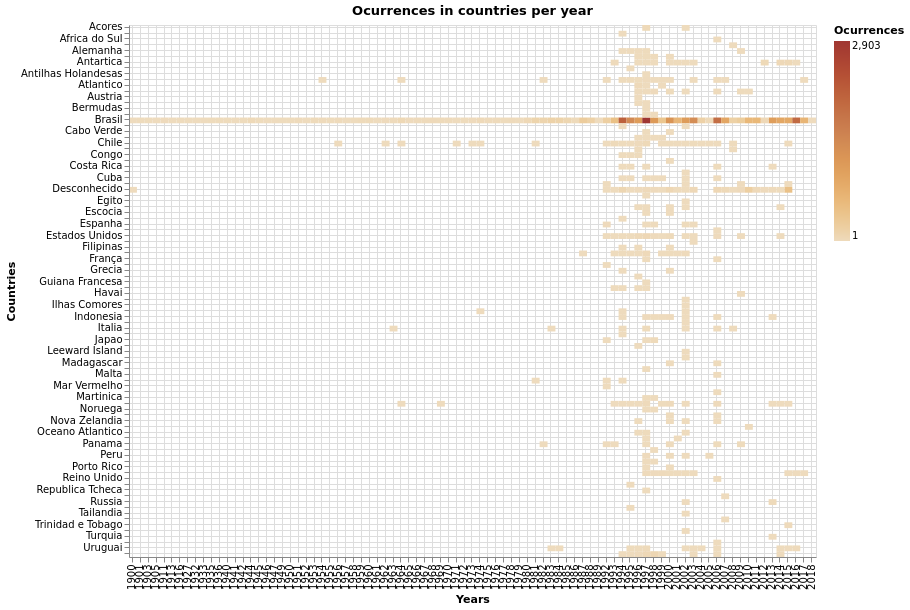

In [23]:
import numpy as np
import pandas as pd
import altair as alt
import datetime as dt
import math as mt
import array as arr

# file_name = './data/db.csv'
# crustaceas = pd.read_csv(file_name, sep=',', encoding='utf-8', index_col=False, low_memory=False)


Table_Date = crustaceas[['Cataloged Date','Country']]

d = []
counter=0
for row in Table_Date['Cataloged Date']:
#     print(row)
    if not str(row).find('/')==-1:
        dates_values = str(row).split("/")
        year = int(dates_values[0])
        month = int(dates_values[1])
        if (month>1) and (month<12):
            #store the year and month in a datetime datatype for later sorting
            dateRecord = dt.datetime(year,month,1)
    d.append({'year':year, 'state':Table_Date.loc[counter,'Country']})
    counter = counter+1
NewTable_Date = pd.DataFrame(d)
NewTable_Date

classes = NewTable_Date['state'].unique()


e = []
countam = 0
for classSp in classes:
    p = NewTable_Date.loc[NewTable_Date.loc[:,'state']==classSp,:]
#     p.year.value_counts()
#     print(p['class'])
    numbers = p.year.value_counts(sort=False)
#     print(p.year.value_counts(sort=False))
    for oneyear in p.year.unique():
        countam = countam + numbers.loc[oneyear]
        e.append({'state':p['state'].unique()[0],'year':oneyear,'amount':numbers.loc[oneyear]})
NewTable_Years = pd.DataFrame(e)
# # # NewTable_Years

# amount = NewTable_Date['year'].value_counts(sort=True)
# ordered_amount = amount.sort_index()
# F_amount=pd.DataFrame({'x': np.arange(ordered_amount.size), 'y': ordered_amount})
# width=1200,height=200,
alt.Chart(NewTable_Years,title='Ocurrences in countries per year',autosize='fit', width=900, height=600
         ).mark_rect().encode(
    x= alt.X('year', type='nominal', title='Years',axis=alt.Axis(grid=True),),
    y= alt.Y('state', type='ordinal', title='Countries',axis=alt.Axis(grid=True)),
    color=alt.Color('amount', title='Ocurrences',scale=alt.Scale(scheme='browns'),)
)

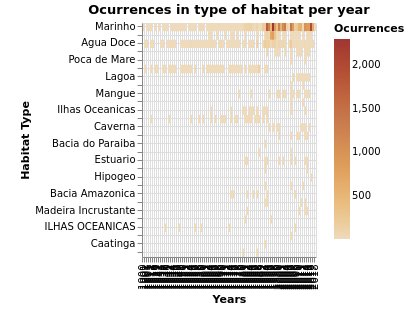

In [24]:
import numpy as np
import pandas as pd
import altair as alt
import datetime as dt
import math as mt
import array as arr

# file_name = './data/db.csv'
# crustaceas = pd.read_csv(file_name, sep=',', encoding='utf-8', index_col=False, low_memory=False)


Table_Date = crustaceas[['Cataloged Date','Habitat Type']]
Table_Date

d = []
counter=0
for row in Table_Date['Cataloged Date']:
#     print(row)
    if not str(row).find('/')==-1:
        dates_values = str(row).split("/")
        year = int(dates_values[0])
        month = int(dates_values[1])
        if (month>1) and (month<12):
            #store the year and month in a datetime datatype for later sorting
            dateRecord = dt.datetime(year,month,1)
    d.append({'year':year, 'habitat':Table_Date.loc[counter,'Habitat Type']})
    counter = counter+1
NewTable_Date = pd.DataFrame(d)
NewTable_Date


classes = NewTable_Date['habitat'].unique()


e = []
countam = 0
for classSp in classes:
    p = NewTable_Date.loc[NewTable_Date.loc[:,'habitat']==classSp,:]
#     p.year.value_counts()
#     print(p['class'])
    numbers = p.year.value_counts(sort=False)
#     print(p.year.value_counts(sort=False))
    for oneyear in p.year.unique():
        countam = countam + numbers.loc[oneyear]
        e.append({'habitat':p['habitat'].unique()[0],'year':oneyear,'amount':numbers.loc[oneyear]})
NewTable_Years = pd.DataFrame(e)
NewTable_Years


# amount = NewTable_Date['year'].value_counts(sort=True)
# ordered_amount = amount.sort_index()
# F_amount=pd.DataFrame({'x': np.arange(ordered_amount.size), 'y': ordered_amount})
# width=1200,height=200,
alt.Chart(NewTable_Years,title='Ocurrences in type of habitat per year',autosize='fit').mark_rect().encode(
    x= alt.X('year', type='nominal', title='Years',axis=alt.Axis(grid=True),),
    y= alt.Y('habitat', type='ordinal', title='Habitat Type',axis=alt.Axis(grid=True),
            sort = alt.SortField('amount', order='descending')),
    color=alt.Color('amount', title='Ocurrences',scale=alt.Scale(scheme='browns'),)
)

In [25]:
import numpy as np
import pandas as pd
import altair as alt
import datetime as dt
import math as mt
import array as arr

# file_name = './data/db.csv'
# crustaceas = pd.read_csv(file_name, sep=',', encoding='utf-8', index_col=False, low_memory=False)


Table_Date = crustaceas[['Cataloged Date','Min Depth']]
Table_Date

d = []
counter=0
for row in Table_Date['Cataloged Date']:
#     print(row)
    if not str(row).find('/')==-1:
        dates_values = str(row).split("/")
        year = int(dates_values[0])
        month = int(dates_values[1])
        if (month>1) and (month<12):
            #store the year and month in a datetime datatype for later sorting
            dateRecord = dt.datetime(year,month,1)
    d.append({'year':year, 'depth':Table_Date.loc[counter,'Min Depth']})
    counter = counter+1
NewTable_Date = pd.DataFrame(d)
NewTable_Date


classes = NewTable_Date['depth'].unique()


e = []
countam = 0
for classSp in classes:
    p = NewTable_Date.loc[NewTable_Date.loc[:,'depth']==classSp,:]
#     p.year.value_counts()
#     print(p['class'])
    numbers = p.year.value_counts(sort=False)
#     print(p.year.value_counts(sort=False))
    for oneyear in p.year.unique():
        countam = countam + numbers.loc[oneyear]
        if (p['depth'].unique()[0]>'0'):
            e.append({'depth':p['depth'].unique()[0],'year':oneyear,'amount':numbers.loc[oneyear]})
NewTable_Years = pd.DataFrame(e)
NewTable_Years


# amount = NewTable_Date['year'].value_counts(sort=True)
# ordered_amount = amount.sort_index()
# F_amount=pd.DataFrame({'x': np.arange(ordered_amount.size), 'y': ordered_amount})
# width=1200,height=200,
# alt.Chart(NewTable_Years,title='Ocurrences per depth per year',autosize='fit').mark_rect().encode(
#     x= alt.X('year', type='nominal', title='Years',axis=alt.Axis(grid=True),),
#     y= alt.Y('depth', type='nominal', title='Depth',axis=alt.Axis(grid=True),
#             sort = alt.SortField('depth', order='descending')),
#     color=alt.Color('amount', title='Ocurrences',scale=alt.Scale(scheme='browns'),)
# )

,depth,year,amount
0,22,2014,4
1,22,1999,1
2,22,2009,2
3,22,2010,21
4,22,2011,12
...,...,...,...
1816,1924.5,2016,2
1817,1334,2017,1
1818,1127,2017,3
1819,1305,2017,1


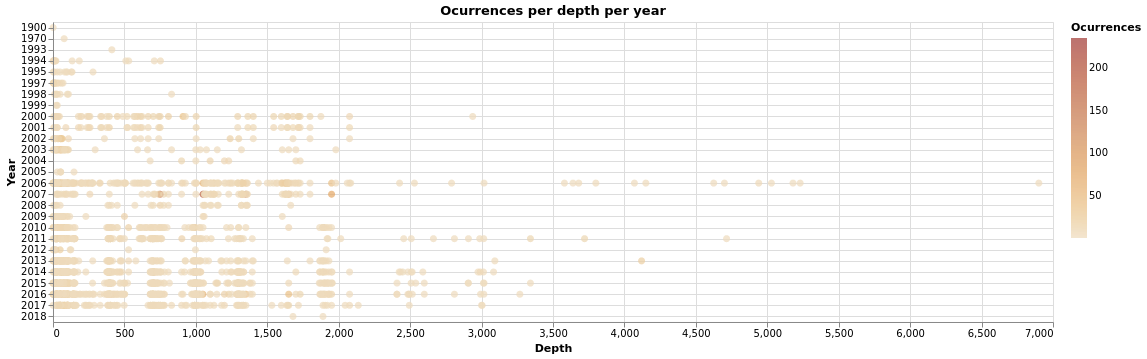

In [26]:
alt.Chart(NewTable_Years,title='Ocurrences per depth per year',width=1000,height=300).mark_circle(size=50).encode(
    x= alt.X('depth:Q', title='Depth',
             axis=alt.Axis(tickCount=10,grid=True,labels=True),
             scale=alt.Scale()),
    y=alt.Y('year',type='nominal',title='Year',axis=alt.Axis(grid=True)),
    color=alt.Color('amount', title='Ocurrences',scale=alt.Scale(scheme='browns')),
    
    
#         x= alt.X('year', type='nominal', title='Years',axis=alt.Axis(grid=True),),
#     y= alt.Y('depth', type='nominal', title='Depth',axis=alt.Axis(grid=True),
#             sort = alt.SortField('depth', order='descending')),
#     color=alt.Color('amount', title='Ocurrences',scale=alt.Scale(scheme='browns'),)

)

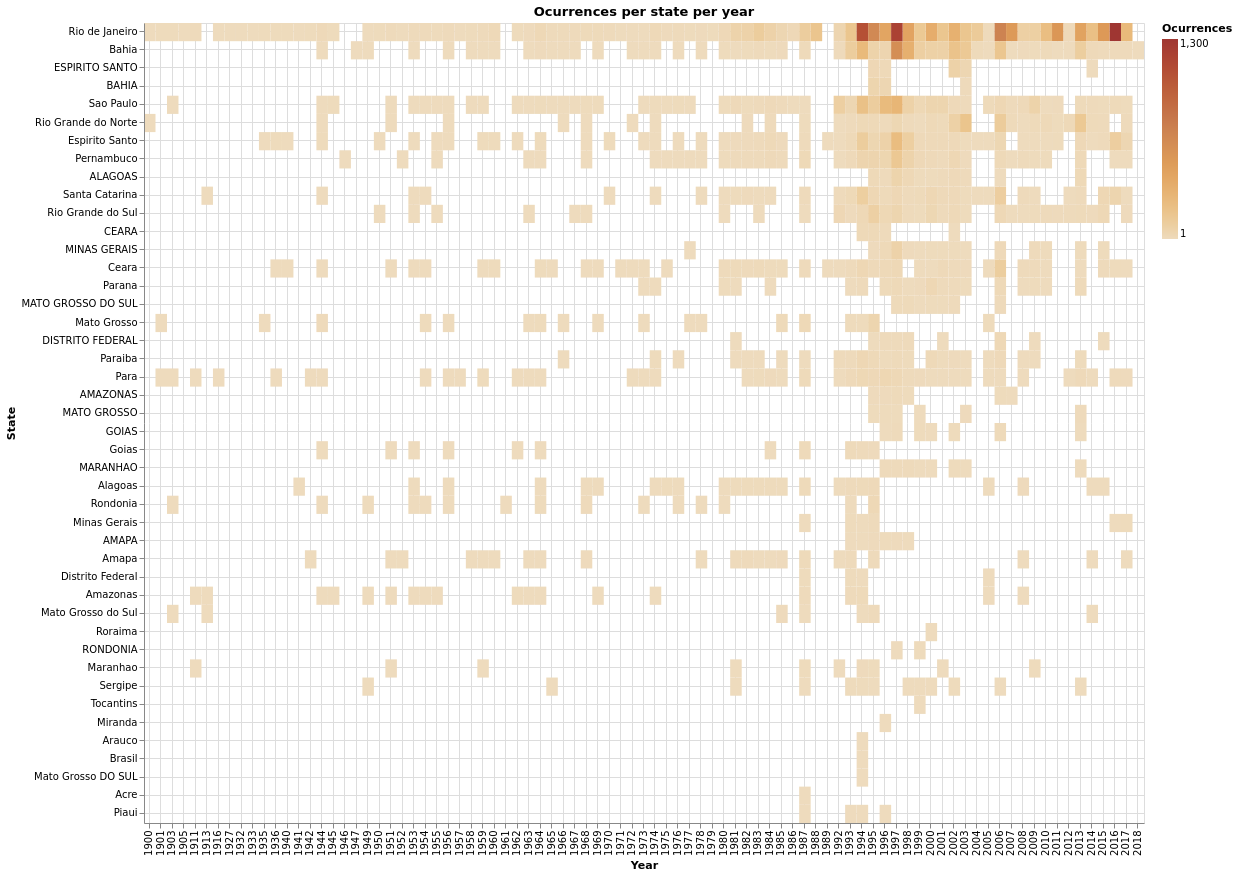

In [27]:
import numpy as np
import pandas as pd
import altair as alt
import datetime as dt
import math as mt
import array as arr

# file_name = './data/db.csv'
# crustaceas = pd.read_csv(file_name, sep=',', encoding='utf-8', index_col=False, low_memory=False)


Table_Date = crustaceas[['Cataloged Date','Country','State']]

d = []
counter=0
for row in Table_Date['Cataloged Date']:
#     print(row)
    if not str(row).find('/')==-1:
        dates_values = str(row).split("/")
        year = int(dates_values[0])
        month = int(dates_values[1])
        if (month>1) and (month<12):
            #store the year and month in a datetime datatype for later sorting
            dateRecord = dt.datetime(year,month,1)
    if Table_Date.loc[counter,'Country']=="Brasil":
        d.append({'year':year, 'state':Table_Date.loc[counter,'State']})
    counter = counter+1
NewTable_Date = pd.DataFrame(d)
NewTable_Date

classes = NewTable_Date['state'].unique()
classes

e = []
countam = 0
for classSp in classes:
    p = NewTable_Date.loc[NewTable_Date.loc[:,'state']==classSp,:]
#     p.year.value_counts()
#     print(p)
    numbers = p.year.value_counts(sort=False)
#     print(p.year.value_counts(sort=False))
    for oneyear in p.year.unique():
        countam = countam + numbers.loc[oneyear]
        e.append({'state':p['state'].unique()[0],'year':oneyear,'amount':numbers.loc[oneyear]})
NewTable_Years = pd.DataFrame(e)
NewTable_Years

alt.Chart(NewTable_Years,title='Ocurrences per state per year',width=1000,height=800).mark_rect().encode(
    y= alt.Y('state:N', title='State',
             axis=alt.Axis(tickCount=10,grid=True,labels=True),
             scale=alt.Scale(),
            sort = alt.SortField('amount', order='descending')),
    x=alt.X('year',type='nominal',title='Year',axis=alt.Axis(grid=True)),
    color=alt.Color('amount', title='Ocurrences',scale=alt.Scale(scheme='browns')),
    
    
#         x= alt.X('year', type='nominal', title='Years',axis=alt.Axis(grid=True),),
#     y= alt.Y('depth', type='nominal', title='Depth',axis=alt.Axis(grid=True),
#             sort = alt.SortField('depth', order='descending')),
#     color=alt.Color('amount', title='Ocurrences',scale=alt.Scale(scheme='browns'),)

)

In [28]:
import numpy as np
import pandas as pd
import altair as alt
import datetime as dt
import math as mt
import array as arr

# file_name = './data/db.csv'
# crustaceas = pd.read_csv(file_name, sep=',', encoding='utf-8', index_col=False, low_memory=False)


Table_Date = crustaceas[['Min Depth','Country','State']]
Table_Date
print

d = []
counter=0
for row in Table_Date['Min Depth']:
    print(Table_Date.loc[counter,'Country'])
#     if (Table_Date.loc[counter,'Country']=="Brasil"):
#         print(row)
#     if not str(row).find('m')==-1:
#         dates_values = str(row).split("m")
#         value = int(dates_values[0])
# # #         print("here")
# # #         print(dates_values[0])
# # #         print(dates_values[1])

# # #         month = int(dates_values[1])
# # #         if (month>1) and (month<12):
# # #             #store the year and month in a datetime datatype for later sorting
# # #             dateRecord = dt.datetime(year,month,1)
#             if value>96:
#                 d.append({'depth':value, 'state':Table_Date.loc[counter,'State']})
    counter = counter+1
NewTable_Date = pd.DataFrame(d)
NewTable_Date

# classes = NewTable_Date['state'].unique()
# classes

# e = []
# countam = 0
# for classSp in classes:
#     p = NewTable_Date.loc[NewTable_Date.loc[:,'state']==classSp,:]
# #     p.year.value_counts()
# #     print(p['class'])
#     numbers = p.depth.value_counts(sort=False)
# #     print(p.year.value_counts(sort=False))
#     for oneyear in p.depth.unique():
#         countam = countam + numbers.loc[oneyear]
#         e.append({'state':p['state'].unique()[0],'depth':oneyear,'amount':numbers.loc[oneyear]})
# NewTable_Years = pd.DataFrame(e)
# NewTable_Years

# alt.Chart(NewTable_Years,title='Ocurrences per state per year',width=1000,height=800).mark_rect().encode(
#     y= alt.Y('state', title='State',
             
#              scale=alt.Scale(),
#             sort = alt.SortField('amount', order='descending')),
#     x=alt.X('depth',type='nominal',title='Year',axis=alt.Axis(grid=True)),
#     color=alt.Color('amount', title='Ocurrences',scale=alt.Scale(scheme='browns')),
    
    
#         x= alt.X('year', type='nominal', title='Years',axis=alt.Axis(grid=True),),
#     y= alt.Y('depth', type='nominal', title='Depth',axis=alt.Axis(grid=True),
#             sort = alt.SortField('depth', order='descending')),
#     color=alt.Color('amount', title='Ocurrences',scale=alt.Scale(scheme='browns'),)

# )

Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Mar Mediterraneo
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Bra

Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil

Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Desconhecido
Desconhecido
Desconhecido
Desconhecido
Desconhecido
Desconhecido
Desconhecido
Desconhecido
Desconhecido
Desconhecido
Desconhecido
Argentina
Desconhecido
Desconhecido
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Br

Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Desconhecido
Brasil
Brasil
Brasil
Brasil
Brasil
Argentina
Brasil
Brasil
Brasil
Desconhecido
Brasil
Brasil
Desconhecido
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Grecia
Chile
Chile
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Desconhecido
Brasil
Brasil
Brasil
Desconhecido
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Desconhecido
Brasil
Desconhecido
Brasil
Brasil
Brasil
Brasil
Desconhecido
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Desconhecido
Brasil
Brasil
Brasil
Brasil
Desconhecido
Desconhecido
Desconhecido
Desconhecido
Desconhecido
Desconhecido
Desconhecido
Desconhecido
Desconhecido
Desconhecido
Desconhecido
Brasil
Bras

Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
nan
nan
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Mexico
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Republica Dominicana
Brasil
Venezuela
Brasil
Argentina
nan
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
nan
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Argentina
Ar

Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil

Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Malasia
Malasia
Brasil
Brasil
Estados Unidos
Brasil
Brasil
Estados Unidos
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Desconhecido
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Angola
Brasil
Portugal
Brasil
Brasil
Brasil
Brasil
Brasil
Angola
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
B

Indonesia
Indonesia
Indonesia
Indonesia
Portugal
Portugal
Portugal
Portugal
Portugal
Portugal
Portugal
Portugal
Brasil
Brasil
Brasil
Brasil
Venezuela
Brasil
Brasil
Panama
Venezuela
Italia
Estados Unidos
Brasil
Venezuela
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Venezuela
Venezuela
Venezuela
Venezuela
Venezuela
Venezuela
Brasil
Brasil
Venezuela
Venezuela
Venezuela
Venezuela
Venezuela
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Venezuela
Venezuela
Venezuela
Venezuela
Venezuela
Venezuela
Venezuela
Venezuela
Venezuela
Venezuela
Venezuela
Brasil
Brasil
Brasil
Brasil
Brasil
Venezuela
Venezuela
Venezuela
Brasil
Brasil
Brasi

Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Noruega
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Desconhecido
Estados Unidos
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Antartica
Antartica
Antartica
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Desconhecido
Desconhecido
Desconhecido
Desconhecido
Desconhecido
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
B

Brasil
Indonesia
Brasil
Brasil
Brasil
Escocia
Brasil
Brasil
Desconhecido
Brasil
Brasil
Brasil
Brasil
Desconhecido
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Franca
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Grecia
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Mexico
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Estados Unidos
Equador
Estados Unidos
Estados Unidos
Estados Unidos
Estados Unidos
Brasil
Mexico
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasi

Australia
Holanda
Curacao
Nova Zelandia
Leeward Island
Inglaterra
Estados Unidos
Estados Unidos
Chile
Estados Unidos
Russia
Libano
Brasil
Brasil
Brasil
Brasil
Brasil
Franca
Estados Unidos
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Franca
Brasil
Desconhecido
Brasil
Brasil
Brasil
Brasil
Desconhecido
Brasil
Brasil
Brasil
Oceano Atlantico
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil

Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Desconhecido
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil


Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil

Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Desconhecido
Desconhecido
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Desconhecido
Brasil
Alasca
Alasca
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Colombia
Brasil
Colombia
Brasil
Brasil
Brasil
Colombia
Desconhecido
Brasil
Brasil
Italia
Italia
Italia
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Desconhecido
Desconhecido
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Australia
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Australia
Australia
Aust

Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Desconhecido
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Desconhecido
Desconhecido
Desconhecido
Desconhecido
Desconhecido
Desconhecido

Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Desconhecido
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Desconhecido
Uruguai
Uruguai
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Venezuela
Brasil
Brasil
Brasil
Desconhecido
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Bras

Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
nan
nan
nan
nan
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
Brasil
nan
nan
nan
nan
nan


""


In [29]:
import numpy as np
import pandas as pd
import altair as alt
import datetime as dt
import math as mt
import array as arr

# file_name = './data/db.csv'
# crustaceas = pd.read_csv(file_name, sep=',', encoding='utf-8', index_col=False, low_memory=False)

Table_Date = crustaceas[['Cataloged Date','Class1','Order1','Kingdom','StardDepth']]
d = []
counter=0
avg_depth=0
max_depth=0
min_depth=0
var_depth=0
for row in Table_Date['Cataloged Date']:
#     print(row)
    if not str(row).find('/')==-1:
        dates_values = str(row).split("/")
        year = int(dates_values[0])
        month = int(dates_values[1])
        if (month>1) and (month<12):
            #store the year and month in a datetime datatype for later sorting
            dateRecord = dt.datetime(year,month,1)       
    thedepth=0
    s=0
    if not Table_Date.loc[counter,'StardDepth']==-1:
        valuewithoutm = str(Table_Date.loc[counter,'StardDepth']).split("m")
        if not valuewithoutm[0]=='nan':
#             print(valuewithoutm[0])
            s = valuewithoutm[0].replace(',', '')
            thedepth = float(s)
#             avg_depth=avg_depth+thedepth
#             if thedepth<min_depth:
#                 min_depth=thedepth
#             if thedepth>max_depth:
#                 max_depth=thedepth
    d.append({'year':year, 'class':Table_Date.loc[counter,'Class1'], 'order':Table_Date.loc[counter,'Order1'],
              'kingdom':Table_Date.loc[counter,'Kingdom'],'depth':thedepth})
#     check not null and take out commas and mm
    counter = counter+1  
NewTable_Date = pd.DataFrame(d)
# avg_depth = avg_depth/counter
# print(avg_depth)
# print(min_depth)
# print(max_depth)

classes = NewTable_Date['order'].unique()

e = []
countam = 0
for classSp in classes:
    p = NewTable_Date.loc[NewTable_Date.loc[:,'order']==classSp,:]
    #     a = np.var(float(p.depth[0]))
#     p.year.value_counts()
#     print(p['class'])
    numbers = p.year.value_counts(sort=False)
#     print(p.year.value_counts(sort=False))
    for oneyear in p.year.unique():
        thedeptha = p['depth'].unique()[0]
        avg_depth=avg_depth+thedeptha
        if thedeptha<min_depth:
            min_depth=thedeptha
        if thedeptha>max_depth:
            max_depth=thedeptha
        countam = countam + numbers.loc[oneyear]
        avg_depth = avg_depth/countam
        e.append({'order':p['order'].unique()[0],'kingdom':p.kingdom.unique()[0],'year':oneyear,
                  'amount':numbers.loc[oneyear],'avg_depth':avg_depth,
                  'min_depth':min_depth,'max_depth':max_depth})
NewTable_Years = pd.DataFrame(e)
NewTable_Years

alt.Chart(NewTable_Years,title='Ocurrences per depth per year',width=900,height=600).mark_circle(size=50).encode(
    y= alt.Y('order:N', title='Depth',
             axis=alt.Axis(tickCount=10,grid=True,labels=True),
             scale=alt.Scale()),
    x=alt.X('year',type='nominal',title='Year',axis=alt.Axis(grid=True)),
    color=alt.Color('amount', title='Ocurrences',scale=alt.Scale(scheme='browns')),
    
    
#         x= alt.X('year', type='nominal', title='Years',axis=alt.Axis(grid=True),),
#     y= alt.Y('depth', type='nominal', title='Depth',axis=alt.Axis(grid=True),
#             sort = alt.SortField('depth', order='descending')),
#     color=alt.Color('amount', title='Ocurrences',scale=alt.Scale(scheme='browns'),)

)

KeyError: "['StardDepth'] not in index"

alt.Chart(...)

In [30]:
alt.Chart(NewTable_Years,title='Ocurrences per depth per year',width=800,height=800).mark_circle(
    size=80).encode(
    x= alt.X('year:N', title='Year',
             axis=alt.Axis(tickCount=10,grid=True,labels=True),
             scale=alt.Scale()),
    y=alt.Y('order',type='nominal',title='Order',axis=alt.Axis(grid=True),
            sort = alt.SortField('amount', order='descending')
            ),
    color=alt.Color('max_depth', title='Depth',scale=alt.Scale(scheme='browns')),
    size=alt.Size('amount',scale=alt.Scale(range=[50,1000]))
#     order=alt.Order('amount',sort='descending')

)


ValueError: max_depth encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

alt.Chart(...)

In [31]:
import numpy as np
import pandas as pd
import altair as alt
import datetime as dt
import math as mt
import array as arr

# file_name = './data/db.csv'
# crustaceas = pd.read_csv(file_name, sep=',', encoding='utf-8', index_col=False, low_memory=False)

Table_Date = crustaceas[['Cataloged Date','Order1','Kingdom','StardDepth']]
d = []
counter=0
for row in Table_Date['Order1']:
#     print(row)
    if not Table_Date.loc[counter,'StardDepth']==-1:
        valuewithoutm = str(Table_Date.loc[counter,'StardDepth']).split("m")
        if not valuewithoutm[0]=='nan':
#             print(valuewithoutm[0])
            s = valuewithoutm[0].replace(',', '')
            thedepth = float(s)
#             avg_depth=avg_depth+thedepth
#             if thedepth<min_depth:
#                 min_depth=thedepth
#             if thedepth>max_depth:
#                 max_depth=thedepth
    d.append({'order':row, 'depth':thedepth})
#     check not null and take out commas and mm
    counter = counter+1  
NewTable_Date11 = pd.DataFrame(d)
NewTable_Date11
classes = NewTable_Date11['order'].unique()

e = []
countam = 0
for classSp in classes:
#     print(classSp)
    p = NewTable_Date11.loc[NewTable_Date11.loc[:,'order']==classSp,:]
    numbers = p.depth.value_counts(sort=False)
    for oneyear in p.depth.unique():
        countam = countam + numbers.loc[oneyear]
        e.append({'order':p['order'].unique()[0],'depth':oneyear,'amount':countam})
NewTable_Years = pd.DataFrame(e)


alt.Chart(NewTable_Years,title='Ocurrences per depth per year',width=800,height=500).mark_circle(
    size=80).encode(
    y= alt.Y('depth:Q', title='Year',
             axis=alt.Axis(tickCount=10,grid=True,labels=True),
             scale=alt.Scale()),
    x=alt.X('order:N',title='Order',axis=alt.Axis(grid=True),sort = alt.SortField('amount', order='descending')),
                    
    size=alt.Size('amount',scale=alt.Scale())
#         x= alt.X('year', type='nominal', title='Years',axis=alt.Axis(grid=True),),
#     y= alt.Y('depth', type='nominal', title='Depth',axis=alt.Axis(grid=True),
#             sort = alt.SortField('depth', order='descending')),
#     color=alt.Color('amount', title='Ocurrences',scale=alt.Scale(scheme='browns'),)

).configure_axis(
        labelFontSize=12,
        titleFontSize=16,
        domainWidth=0.0
).properties(
)

KeyError: "['StardDepth'] not in index"

In [32]:
e = []
countam = 0
for classSp1 in classes:
#     print(classSp)
    p = NewTable_Date11.loc[NewTable_Date11.loc[:,'order']=='Decapoda',:]
    e.append({'order':p['order'].unique()[0],'depth':oneyear,'year':p['year'].unique()[0]})
NewTable_Years = pd.DataFrame(e)
NewTable_Years

NameError: name 'NewTable_Date11' is not defined